In [1]:
import rioxarray as rioxr

import pystac_client
import planetary_computer

In [2]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [3]:
# sequoia natl park
box_bounds = [-119.28376473993174, 35.561681976121605, -117.15965333370627, 36.65291223580975]
datetime = '2023'

search = catalog.search(collections=["modis-13A1-061"],
                        datetime=datetime,
                        bbox=box_bounds)
items = search.item_collection()
len(items)

41

In [4]:
item = items[0]
item.properties

{'created': '2023-11-28T03:13:20Z',
 'updated': '2023-11-27T21:33:47.287000Z',
 'datetime': None,
 'platform': 'aqua',
 'proj:epsg': None,
 'proj:wkt2': 'PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]',
 'proj:shape': [2400, 2400],
 'instruments': ['modis'],
 'end_datetime': '2023-11-24T23:59:59Z',
 'modis:tile-id': '51008005',
 'proj:geometry': {'type': 'Polygon',
  'coordinates': [[[-10007554.677, 3335851.559],
    [-10007554.677, 4447802.078667],
    [-11119505.196667, 4447802.078667],
    [-11119505.196667, 3335851.559],
    [-10007554.677, 3335851.559]]]},
 'proj:transform': [463.31271652791725,
  0.0,
  -1111

In [6]:
print('end time:', item.properties['end_datetime'])
print('start time:', item.properties['start_datetime'])

end time: 2023-11-24T23:59:59Z
start time: 2023-11-09T00:00:00Z


In [7]:
item.assets

{'hdf': <Asset href=https://modiseuwest.blob.core.windows.net/modis-061/MYD13A1/08/05/2023313/MYD13A1.A2023313.h08v05.061.2023331221320.hdf?st=2023-11-29T02%3A00%3A54Z&se=2023-12-07T02%3A00%3A54Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-11-30T02%3A00%3A53Z&ske=2023-12-07T02%3A00%3A53Z&sks=b&skv=2021-06-08&sig=CLELW6OaVltuwyG7yFGlSZV8y7G/IXTS6RgAhM39WiQ%3D>,
 'metadata': <Asset href=https://modiseuwest.blob.core.windows.net/modis-061/MYD13A1/08/05/2023313/MYD13A1.A2023313.h08v05.061.2023331221320.hdf.xml?st=2023-11-29T02%3A00%3A54Z&se=2023-12-07T02%3A00%3A54Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-11-30T02%3A00%3A53Z&ske=2023-12-07T02%3A00%3A53Z&sks=b&skv=2021-06-08&sig=CLELW6OaVltuwyG7yFGlSZV8y7G/IXTS6RgAhM39WiQ%3D>,
 '500m_16_days_EVI': <Asset href=https://modiseuwest.blob.core.windows.net/modis-061-cogs/MYD13A1/08/05/2023313/M

In [8]:
for key, asset in item.assets.items():
    print(key, '-', asset.title)

hdf - Source data containing all bands
metadata - Federal Geographic Data Committee (FGDC) Metadata
500m_16_days_EVI - 500m 16 days EVI
500m_16_days_NDVI - 500m 16 days NDVI
500m_16_days_VI_Quality - VI quality indicators
500m_16_days_MIR_reflectance - Surface Reflectance Band 7
500m_16_days_NIR_reflectance - Surface Reflectance Band 2
500m_16_days_red_reflectance - Surface Reflectance Band 1
500m_16_days_blue_reflectance - Surface Reflectance Band 3
500m_16_days_sun_zenith_angle - Sun zenith angle of VI pixel
500m_16_days_pixel_reliability - Quality reliability of VI pixel
500m_16_days_view_zenith_angle - View zenith angle of VI Pixel
500m_16_days_relative_azimuth_angle - Relative azimuth angle of VI pixel
500m_16_days_composite_day_of_the_year - Day of year VI pixel
tilejson - TileJSON with default rendering
rendered_preview - Rendered preview


In [9]:
data = rioxr.open_rasterio(item.assets['500m_16_days_NDVI'].href).squeeze()
data

<xarray.DataArray (y: 2400, x: 2400)>
[5760000 values with dtype=int16]
Coordinates:
    band         int64 1
  * x            (x) float64 -1.112e+07 -1.112e+07 ... -1.001e+07 -1.001e+07
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
    spatial_ref  int64 0
Attributes: (12/183)
    add_offset:                          0.0
    add_offset_err:                      0
    ALGORITHMPACKAGEACCEPTANCEDATE:      102004
    ALGORITHMPACKAGEMATURITYCODE:        Normal
    ALGORITHMPACKAGENAME:                MOD_PR13A1
    ALGORITHMPACKAGEVERSION:             6
    ...                                  ...
    units:                               NDVI
    valid_range:                         -2000, 10000
    VERSIONID:                           61
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -130.540728914638
    _FillValue:                          -3000

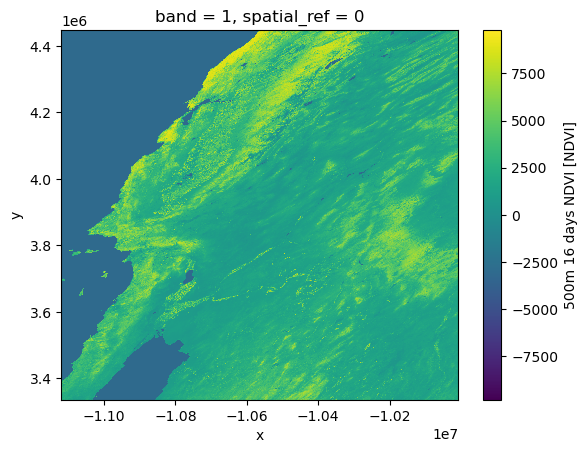

In [10]:
data.plot.imshow(cmap='viridis')

In [12]:
extra_fields = item.assets["500m_16_days_NDVI"].extra_fields["raster:bands"][0]

In [13]:
extra_fields['scale']

0.0001

In [14]:
ndvi = data * extra_fields['scale']


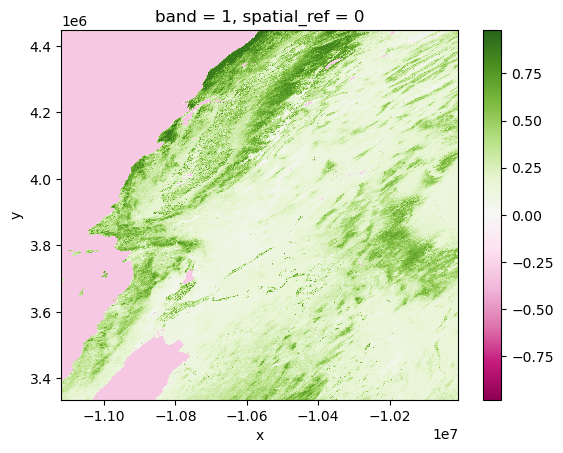

In [15]:
ndvi.plot.imshow(cmap="PiYG")

In [16]:
ndvi.rio.to_raster('sierra_ndvi.tif')

In [17]:
rioxr.open_rasterio('sierra_ndvi.tif')

<xarray.DataArray (band: 1, y: 2400, x: 2400)>
[5760000 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -1.112e+07 -1.112e+07 ... -1.001e+07 -1.001e+07
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0